In [ ]:
#What are the ten most popular movies?
#Choose what you consider to be a reasonable defintion of "popular".
#Be perpared to defend this choice.
#Make some conjectures about how easy various groups are to please? Support your answers with data!
#For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children. This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
#Be sure to come up with your own conjectures and support them with data!

In [288]:
import numpy as np
import matplotlib.pylab as py
import pandas as pd
import scipy.stats as st
np.set_printoptions(precision=2)
%matplotlib inline

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None,
                      names=unames, engine='python')


rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None,
                        names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::', header=None,
                        names=mnames, engine='python')

data = pd.merge(pd.merge(ratings, users) , movies)

data.loc[data['age'] < 18 , 'age_interval'] = "Under 18"
data.loc[(data['age'] >= 18) & (data['age'] < 25), 'age_interval'] = "18-24"
data.loc[(data['age'] >= 25) & (data['age'] < 35), 'age_interval'] = "25-34"
data.loc[(data['age'] >= 35)  & (data['age'] < 45), 'age_interval'] = "35-44"
data.loc[(data['age'] >= 45) & (data['age'] < 50), 'age_interval'] = "45-49"
data.loc[(data['age'] >= 50) & (data['age'] < 56), 'age_interval'] = "50-55"
data.loc[data['age'] >= 56, 'age_interval'] = "56+"

Merged_hdf_datastore = pd.HDFStore('Merged_hdf_datastore_data4.h5')
print Merged_hdf_datastore
Merged_hdf_datastore['data'] = data

<class 'pandas.io.pytables.HDFStore'>
File path: Merged_hdf_datastore_data4.h5
/data            frame        (shape->[1000209,11])


In [289]:
#Get top 10 movies with most ratings
Top_10_most_rated = data.groupby(["title"]).size().order(ascending=False)[:20]


C:\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


In [290]:
K = data[data['title'].isin(["American Beauty (1999)","Star Wars: Episode IV - A New Hope (1977)",
                             "Star Wars: Episode V - The Empire Strikes Back (1980)","Star Wars: Episode VI - Return of the Jedi (1983)",
                             "Jurassic Park (1993)","Saving Private Ryan (1998)","Terminator 2: Judgment Day (1991)","Matrix, The (1999)",
                             "Back to the Future (1985)","Silence of the Lambs, The (1991)","Men in Black (1997)",
                             "Raiders of the Lost Ark (1981)","Fargo (1996)","Sixth Sense, The (1999)","Braveheart (1995)",
                             "Shakespeare in Love (1998)","Princess Bride, The (1987)","Schindler's List (1993)","L.A. Confidential (1997)",
                             "Groundhog Day (1993)"])]
C=K.pivot_table('rating',columns=['title'],aggfunc='mean').sort_values(ascending=False)


In [ ]:
'''
Definition of popularity
 we have defined the popularity as the movie that has highest number to rating count.
 Movie with high rating will be "popular good movie" and movie with less rating and still among high rating count will be 
 "bad popular movie".'''

#Based on the above definition here is the top 10 popular movies


In [292]:
#Get top 15 popular movies
# the average rating for movies which are rated more than 100 times.
rating_count = data.groupby(['title'],as_index=False).rating.size().sort_values(ascending=False) 
mean_rating = data.groupby(['title'],as_index=False).rating.mean()#.sort_values(ascending=False)
hh = pd.DataFrame({'count' : rating_count}).reset_index()
#hh["mean"] = mean_rating["rating"]
gg = hh.set_index("title")
gg = gg.query('count >= 100')[:15]
gg.plot(kind="bar")

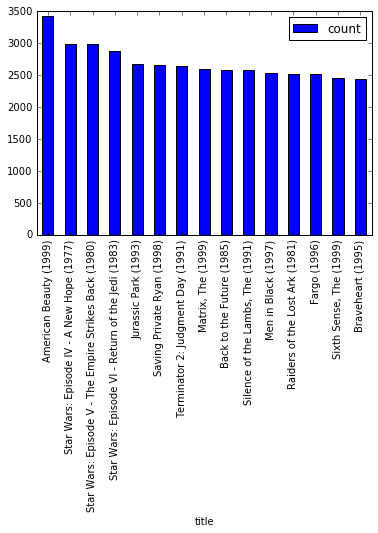

In [ ]:
#Make some conjectures about how easy various groups are to please? Support your answers with data!
#For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all 
#young children. This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
#Be sure to come up with your own conjectures and support them with data!

In [294]:
data1 = data[["age_interval","genres","rating"]]

In [295]:
d2 = data[["age_interval","genres","rating"]].query("age_interval == '18-24' or age_interval == '25-34' or \
                                        age_interval == 'Under 18' or age_interval == '34-44'")


In [296]:
d3 = d2.groupby(["age_interval","genres"]).rating.size().sort_values(ascending=False)
d4 = d3 


In [ ]:
# We are trying to get the most liked movies "genres" for each age group. [Blue]
# Get the highest rated genres among each age group [Green]

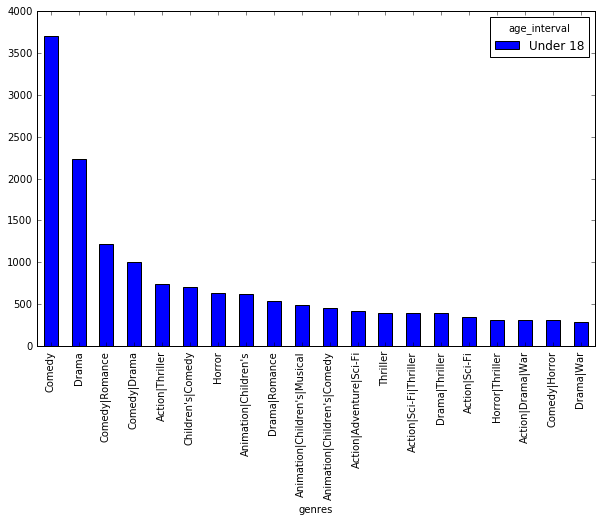

In [246]:
K = data[data['age_interval'].isin(["Under 18"])]
C1824=K.pivot_table('rating',index='genres',columns=['age_interval'],aggfunc='count').sort_values(by='Under 18',ascending=False)
C = C1824.head(20)
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10 #w
fig_size[1] = 6 #H
plt.rcParams["figure.figsize"] = fig_size
C.plot(kind="bar")

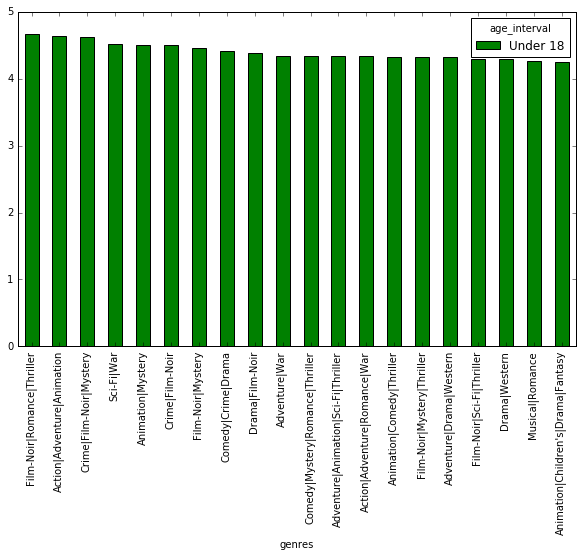

In [267]:
K = data[data['age_interval'].isin(["Under 18"])]
C1824=K.pivot_table('rating',index='genres',columns=['age_interval'],aggfunc='mean').sort_values(by='Under 18',ascending=False)
C = C1824.head(20)
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10 #w
fig_size[1] = 6 #H
plt.rcParams["figure.figsize"] = fig_size
C.plot(kind="bar",color='g')

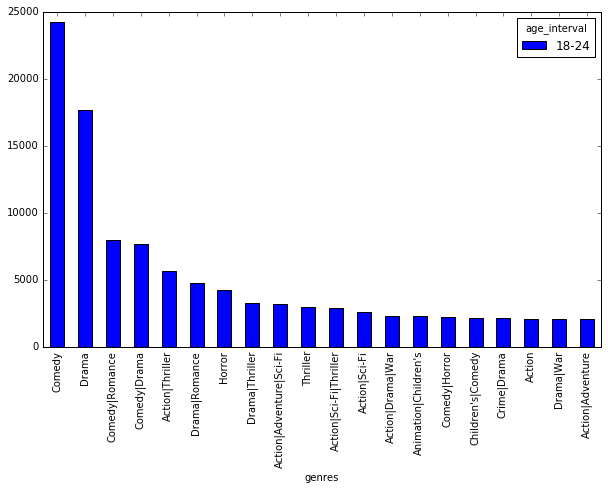

In [225]:
K = data[data['age_interval'].isin(["18-24"])]
C1824=K.pivot_table('rating',index='genres',columns=['age_interval'],aggfunc='count').sort_values(by='18-24',ascending=False)
C = C1824.head(20)
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10 #w
fig_size[1] = 6 #H
plt.rcParams["figure.figsize"] = fig_size
C.plot(kind="bar")


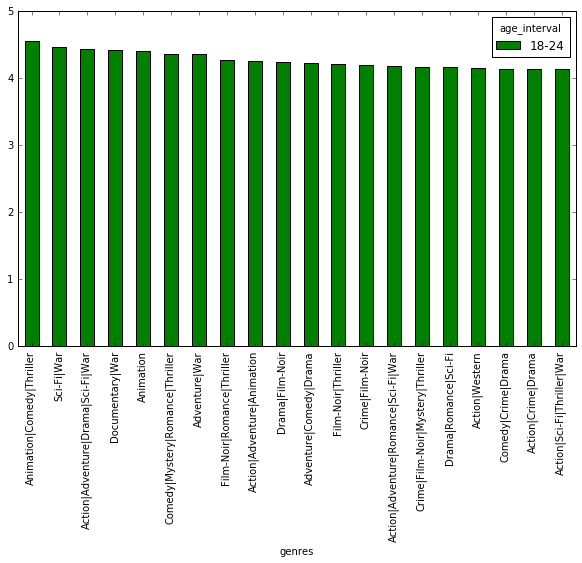

In [257]:
K = data[data['age_interval'].isin(["18-24"])]
C1824=K.pivot_table('rating',index='genres',columns=['age_interval'],aggfunc='mean').sort_values(by='18-24',ascending=False)
C = C1824.head(20)
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10 #w
fig_size[1] = 6 #H
plt.rcParams["figure.figsize"] = fig_size
C.plot(kind="bar",color="g")

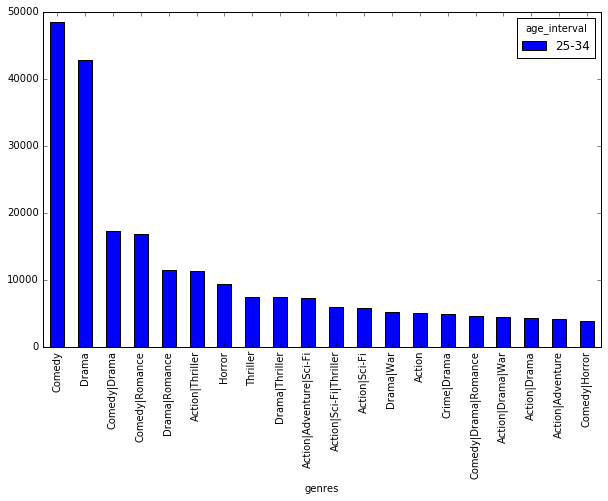

In [242]:
K = data[data['age_interval'].isin(["25-34"])]
C1824=K.pivot_table('rating',index='genres',columns=['age_interval'],aggfunc='count').sort_values(by='25-34',ascending=False)
C = C1824.head(20)
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10 #w
fig_size[1] = 6 #H
plt.rcParams["figure.figsize"] = fig_size
C.plot(kind="bar")


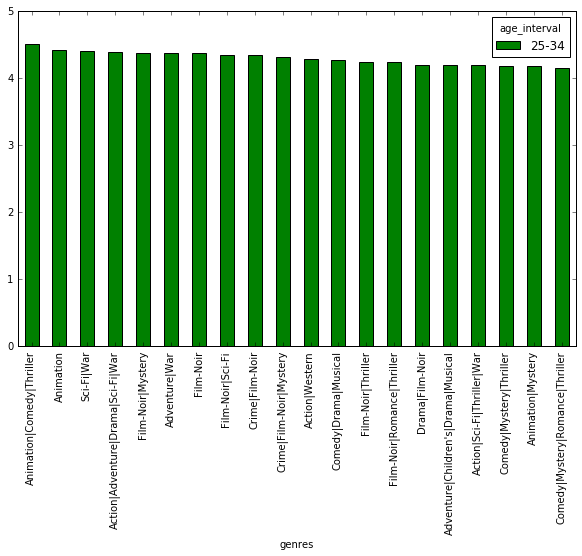

In [260]:
K = data[data['age_interval'].isin(["25-34"])]
C1824=K.pivot_table('rating',index='genres',columns=['age_interval'],aggfunc='mean').sort_values(by='25-34',ascending=False)
C = C1824.head(20)
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10 #w
fig_size[1] = 6 #H
plt.rcParams["figure.figsize"] = fig_size
C.plot(kind="bar",color="g")


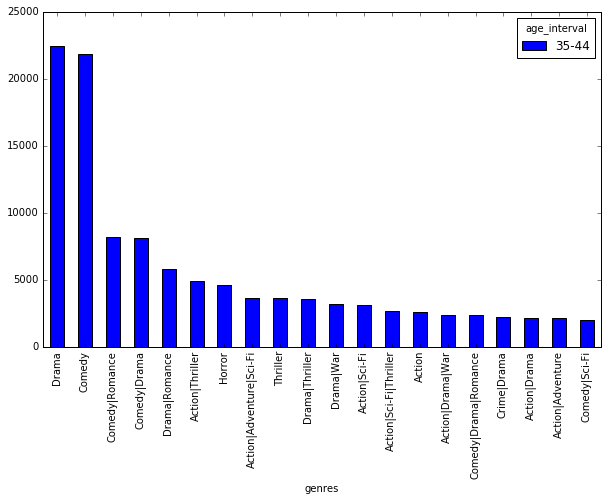

In [229]:
K = data[data['age_interval'].isin(["35-44"])]
C1824=K.pivot_table('rating',index='genres',columns=['age_interval'],aggfunc='count').sort_values(by='35-44',ascending=False)
C = C1824.head(20)
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10 #w
fig_size[1] = 6 #H
plt.rcParams["figure.figsize"] = fig_size
C.plot(kind="bar")


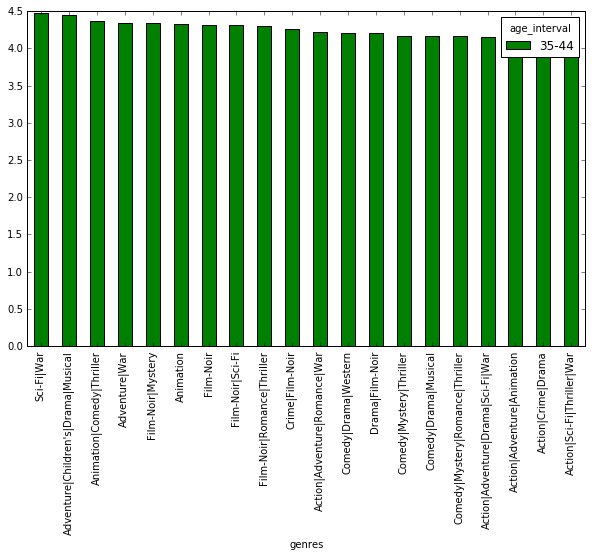

In [258]:
K = data[data['age_interval'].isin(["35-44"])]
C1824=K.pivot_table('rating',index='genres',columns=['age_interval'],aggfunc='mean').sort_values(by='35-44',ascending=False)
C = C1824.head(20)
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10 #w
fig_size[1] = 6 #H
plt.rcParams["figure.figsize"] = fig_size
C.plot(kind="bar",color="g")

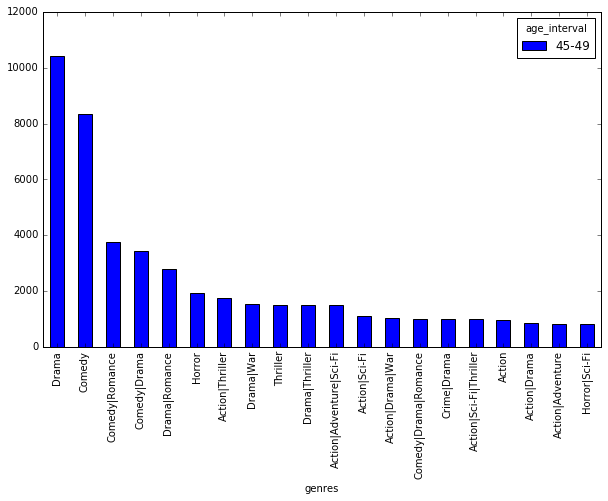

In [230]:
K = data[data['age_interval'].isin(["45-49"])]
C1824=K.pivot_table('rating',index='genres',columns=['age_interval'],aggfunc='count').sort_values(by='45-49',ascending=False)
C = C1824.head(20)
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10 #w
fig_size[1] = 6 #H
plt.rcParams["figure.figsize"] = fig_size
C.plot(kind="bar")


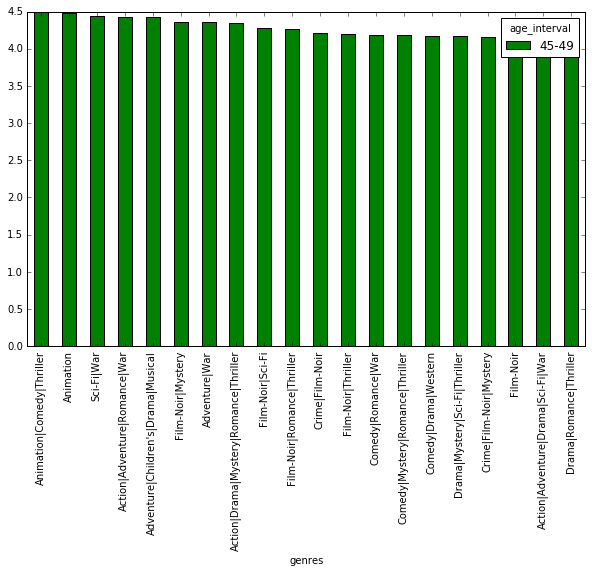

In [259]:
K = data[data['age_interval'].isin(["45-49"])]
C1824=K.pivot_table('rating',index='genres',columns=['age_interval'],aggfunc='mean').sort_values(by='45-49',ascending=False)
C = C1824.head(20)
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10 #w
fig_size[1] = 6 #H
plt.rcParams["figure.figsize"] = fig_size
C.plot(kind="bar",color="g")

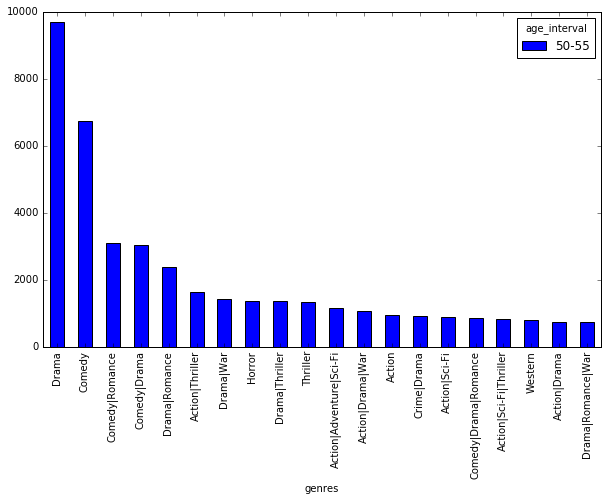

In [231]:
K = data[data['age_interval'].isin(["50-55"])]
C1824=K.pivot_table('rating',index='genres',columns=['age_interval'],aggfunc='count').sort_values(by='50-55',ascending=False)
C = C1824.head(20)
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10 #w
fig_size[1] = 6 #H
plt.rcParams["figure.figsize"] = fig_size
C.plot(kind="bar")

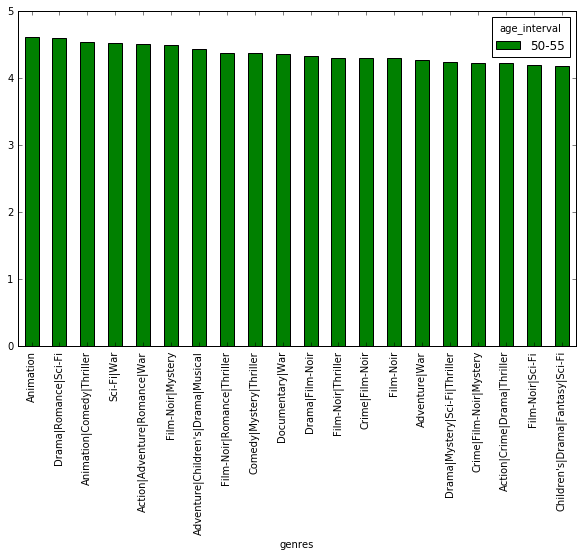

In [261]:
K = data[data['age_interval'].isin(["50-55"])]
C1824=K.pivot_table('rating',index='genres',columns=['age_interval'],aggfunc='mean').sort_values(by='50-55',ascending=False)
C = C1824.head(20)
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10 #w
fig_size[1] = 6 #H
plt.rcParams["figure.figsize"] = fig_size
C.plot(kind="bar",color='g')

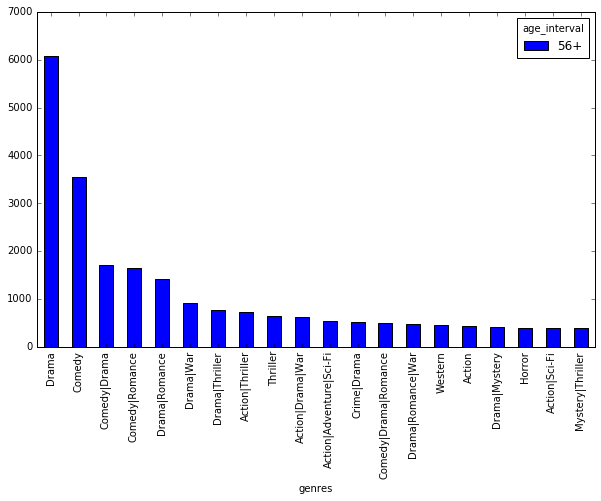

In [232]:
K = data[data['age_interval'].isin(["56+"])]
C1824=K.pivot_table('rating',index='genres',columns=['age_interval'],aggfunc='count').sort_values(by='56+',ascending=False)
C = C1824.head(20)
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10 #w
fig_size[1] = 6 #H
plt.rcParams["figure.figsize"] = fig_size
C.plot(kind="bar")

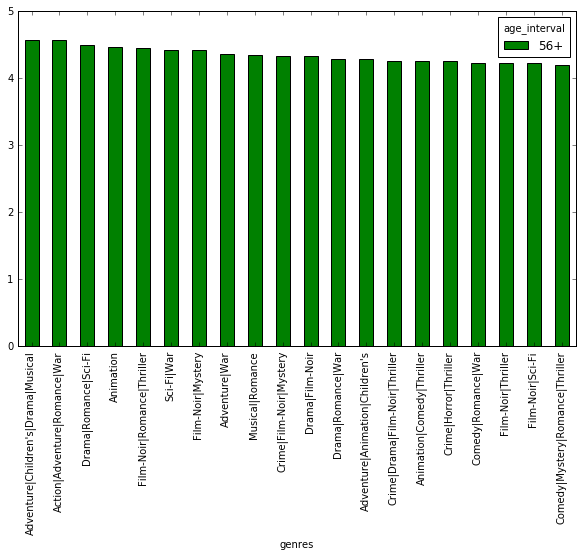

In [266]:
K = data[data['age_interval'].isin(["56+"])]
C1824=K.pivot_table('rating',index='genres',columns=['age_interval'],aggfunc='mean').sort_values(by='56+',ascending=False)
C = C1824.head(20)
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10 #w
fig_size[1] = 6 #H
plt.rcParams["figure.figsize"] = fig_size
C.plot(kind="bar",color='g')

In [ ]:
#To analyse what is the most liked genre among differnt Age groups.
#Based on our current dataset, it is evident that
# "Comedy" and "Drama" are the top two genres of movies that is highly "watched" by all age groups.
# However, as far as liking, all the age groups tends to like "animation" and Sci-fi movie genres
#Also - age group 45-55 are the critical deciders on the movie rating as other group ratings seems flat across genres.